In [3]:
# library
library(ggplot2)
library(tidyverse)
library(ggpubr)

options(repr.plot.width=15, repr.plot.height=15)

Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


ERROR: Error in library(ggpubr): there is no package called 'ggpubr'


In [4]:
#Import CSV

all <- read.csv("data/results/meteorites.csv")

head(all)

X,name,id,nametype,recclass,mass_in_grams,fell_or_found,year,latitude,longitude,GeoLocation,group_name,Chondrite.Achondrite,type,L3,L4
5625,Aachen,1,Valid,L5,21,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",L,Chondrite,Stony,Ordinary,L
568,Aarhus,2,Valid,H6,720,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",H,Chondrite,Stony,Ordinary,H
916,Abajo,4,Valid,H5,331,Found,1982,26.80000,-105.41667,"(26.8, -105.41667)",H,Chondrite,Stony,Ordinary,H
918,Abbott,5,Valid,H3-6,21100,Found,1951,36.30000,-104.28333,"(36.3, -104.28333)",H,Chondrite,Stony,Ordinary,H
399,Abee,6,Valid,EH4,107000,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",EH,Chondrite,Stony,Enstatite,EH-EL
6004,Abernathy,7,Valid,L6,2914,Found,1941,33.85000,-101.80000,"(33.85, -101.8)",L,Chondrite,Stony,Ordinary,L


In [5]:
dim(subset(all, fell_or_found == 'Fell'))
dim(subset(all, fell_or_found == 'Found'))

[1] 1097   16

[1] 8699   16

In [6]:
# To investigate the comparison, I will make a grid. 
# If any number of falls occurred in a grid square, +1, any finds = -1.  
# Then sum.

In [7]:
# First, prep the dataset.

all <- select(all, fell_or_found, latitude, longitude)
head(all)

fell_or_found,latitude,longitude
Fell,50.77500,6.08333
Fell,56.18333,10.23333
Found,26.80000,-105.41667
Found,36.30000,-104.28333
Fell,54.21667,-113.00000
Found,33.85000,-101.80000


In [8]:
all$lat_gs <- floor(all$latitude)
all$long_gs <- floor(all$longitude)
head(all)

fell_or_found,latitude,longitude,lat_gs,long_gs
Fell,50.77500,6.08333,50,6
Fell,56.18333,10.23333,56,10
Found,26.80000,-105.41667,26,-106
Found,36.30000,-104.28333,36,-105
Fell,54.21667,-113.00000,54,-113
Found,33.85000,-101.80000,33,-102


In [9]:
all <- select(all, fell_or_found, lat_gs, long_gs)


In [10]:
fell_u <- unique(all[all$fell_or_found == 'Fell',])
found_u <- unique(all[all$fell_or_found == 'Found',])

head(fell_u)
dim(fell_u)

head(found_u)
dim(found_u)

,fell_or_found,lat_gs,long_gs
1,Fell,50,6
2,Fell,56,10
5,Fell,54,-113
9,Fell,16,-100
367,Fell,-34,-65
374,Fell,32,71


[1] 893   3

,fell_or_found,lat_gs,long_gs
3,Found,26,-106
4,Found,36,-105
6,Found,33,-102
7,Found,60,22
8,Found,27,29
10,Found,27,3


[1] 1244    3

In [11]:
fell_u$ffscore <- 1
found_u$ffscore <- -1

In [12]:
all_u <- rbind(fell_u,found_u)

In [13]:
head(all_u)

,fell_or_found,lat_gs,long_gs,ffscore
1,Fell,50,6,1
2,Fell,56,10,1
5,Fell,54,-113,1
9,Fell,16,-100,1
367,Fell,-34,-65,1
374,Fell,32,71,1


In [14]:
all_u <- select(all_u, lat_gs, long_gs, ffscore)



In [20]:
all_u_agg <- aggregate(.~lat_gs+long_gs, all_u, sum)
all_u_agg


write.csv(all_u_agg, "data/results/gridsquarefellfound.csv")



lat_gs,long_gs,ffscore
64,-164,-1
55,-163,-1
21,-158,1
65,-147,-1
63,-140,-1
11,-138,-1
12,-138,-1
59,-136,-1
59,-135,1
40,-124,-1


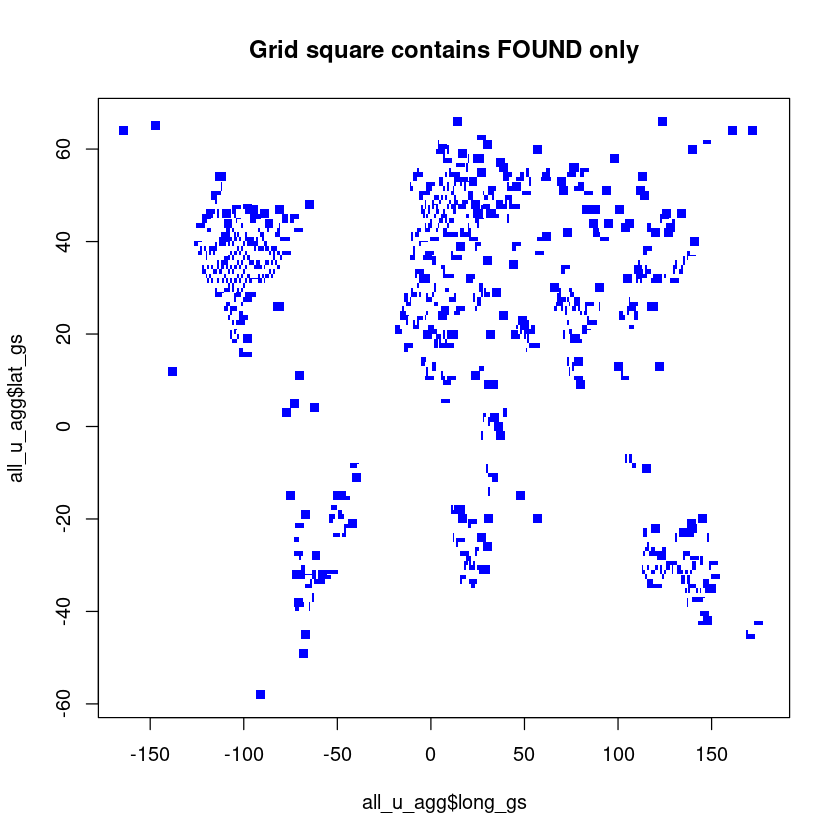

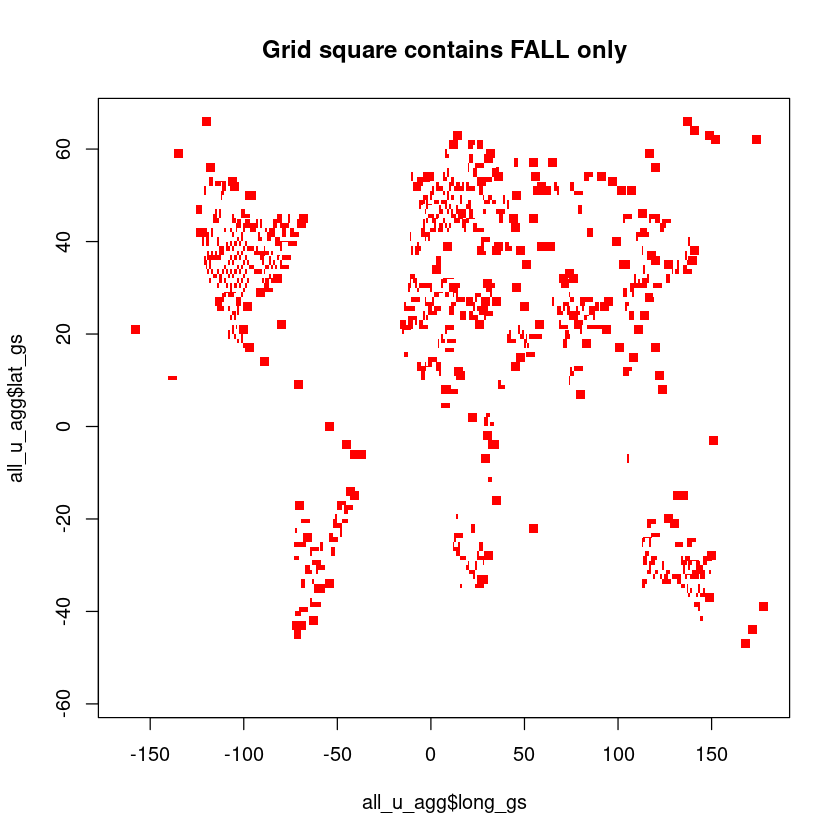

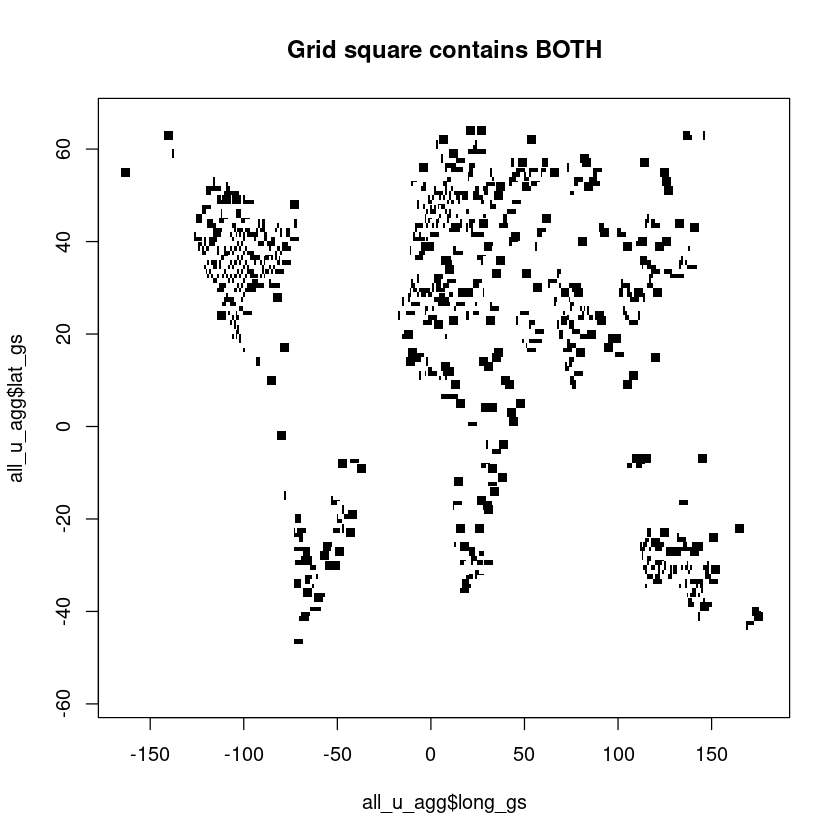

In [16]:
# 3 plots....

plot(x=all_u_agg$long_gs,y=all_u_agg$lat_gs, pch=15, col=c('blue','white','white'), main="Grid square contains FOUND only")
plot(x=all_u_agg$long_gs,y=all_u_agg$lat_gs, pch=15, col=c('white','white','red'), main="Grid square contains FALL only")
plot(x=all_u_agg$long_gs,y=all_u_agg$lat_gs, pch=15, col=c('white','black','white'), main="Grid square contains BOTH")

In [17]:
all_u_agg %>% count(ffscore)

ffscore,n
-1,1063
0,181
1,712


# Results

## Only 181 grid squares had both.  
## 712 were only falls
## 1063 were only finds.

## So, for the most part, falls are not witnessed in the same general location as finds.

In [42]:
all_u_agg2

lat_gs,long_gs,ffscore
64,-164,-1
55,-163,-1
21,-158,1
65,-147,-1
63,-140,-1
11,-138,-1
12,-138,-1
59,-136,-1
59,-135,1
40,-124,-1


In [44]:
library(tidyverse)

all_u_agg2 <- all_u_agg

final <- all_u_agg2 %>%
  mutate(fallorfind = case_when(
    (ffscore == -1) ~ "find",
    (ffscore == 1) ~ "fall",
    (ffscore == 0) ~ "both"      
    ))

head(final)
write.csv(final, "data/results/gridsquarefellfound.csv")


lat_gs,long_gs,ffscore,fallorfind
64,-164,-1,find
55,-163,-1,find
21,-158,1,fall
65,-147,-1,find
63,-140,-1,find
11,-138,-1,find
